## Primeiro bloco: Criando os vetores X e Y com os dados de treinamento

In [1]:
function criar_Y_sigmoid(x) # x é o vetor de inputs
    
    y = zeros(length(x))
    
    for i in 1:length(y)
        
        if x[i] > 0.5
            y[i] = 1
        else y[i] = 0
        end
    end
    
    return(y)
end

function criar_Y_tanh(x) # x é o vetor de inputs
    
    y = zeros(length(x))
    
    for i in 1:length(y)
        
        if x[i] > 0.5
            y[i] = 1
        else y[i] = -1
        end
    end
    
    return(y)
end

criar_Y_tanh (generic function with 1 method)

## Segundo bloco: estrutura da rede neural

In [2]:
linear(x) = x
d_linear(x) = 1.0

sigmoid(x) = 1 / (1 + exp(-x))
d_sigmoid(x) = sigmoid(x) * (1 - sigmoid(x))

#tanh(x) o julia ja sabe
d_tanh(x) = 1 - tanh(x)^2

function predict(x, w, b, f_a) 
    return f_a(x * w + b)
end

predict (generic function with 1 method)

In [3]:
using Statistics: mean
using Plots

function treinar_rede_neural_0!(
        X, Y, # conjunto de dados para o treinamento
        w, b, # parâmetros do modelo - as variáveis a serem otimizadas
        f_a, df_a, # função de ativação e sua derivada
        mu, n_iters) #critérios da otimização)
    
    local loss

    for iteration in 1:n_iters
            
        Y_Predictions = predict.(X, w, b, f_a)
        dw = 0.0
        db = 0.0
        loss = 0.0
        
        for i in 1:length(X)
            loss += (1/length(X)) * (Y_Predictions[i] - Y[i])^2
            dw += (2/length(X)) * (Y_Predictions[i] - Y[i]) * df_a(X[i] * w + b) * X[i]
            db += (2/length(X)) * (Y_Predictions[i] - Y[i]) * df_a(X[i] * w + b)   
        end

        w = w - dw * mu
        b = b - db * mu

    end
    
    return(w, b, loss)
end

function treinar_rede_neural_0_comgrafico!(X, Y, w, b, f_a, df_a, mu, n_iters)

    loss = zeros(n_iters)
    acc = zeros(n_iters)
    lossteste = 0
    Y_teste = zeros(length(Y))
    
    for iteration in 1:n_iters
        
        Y_Predictions = predict.(X, w, b, f_a)
        acc[iteration] = accuracy(w, b, X, Y, f_a)
        dw = 0.0
        db = 0.0
        
        for i in 1:length(X)
            loss[iteration] += (1/length(X)) * sum((Y_Predictions[i] - Y[i]).^2)
            dw += (1/length(X)) * (Y_Predictions[i] - Y[i]) * df_a(X[i] * w + b) * X[i]
            db += (1/length(X)) * (Y_Predictions[i] - Y[i]) * df_a(X[i] * w + b)    
        end
        
        w = w - mu * dw
        b = b - mu * db
        loss_i = round(loss[iteration]; digits = 6)
        acc_i = round(acc[iteration]; digits = 6)
                
        # para plotar a "loss" ao longo das iterações...
        IJulia.clear_output(true)
        loss_plot = scatter(
            [1:10:iteration], loss[1:10:iteration];
            label = "loss",
            yscale=:log10,
            xlabel="iteration",
            ylabel="training loss",
            title="iteration $iteration, loss = $loss_i, accuracy = $acc_i"
            )
        display(loss_plot)
        
    end
    
    return(w, b, loss)
end

treinar_rede_neural_0_comgrafico! (generic function with 1 method)

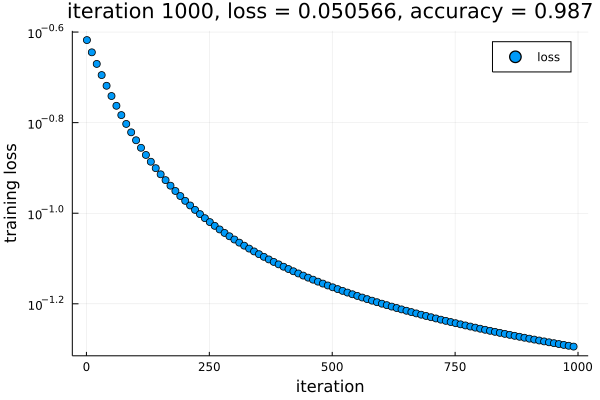

(7.281461116580648, -3.5212016183024812, [0.2411669041118615, 0.23961374721594397, 0.2380859072555862, 0.23658160126244113, 0.23509925562863354, 0.23363748499398948, 0.23219507235532166, 0.23077095054612112, 0.2293641851616185, 0.22797395894834516  …  0.0507583603002977, 0.050736809837470136, 0.05071529313824301, 0.05069381011350583, 0.0506723606744753, 0.05065094473269289, 0.05062956220002389, 0.050608212988655844, 0.05058689701109671, 0.05056561418017389])

In [4]:
X = rand(1000) # essa linha cria um vetor de 1000 amostras entre 0 e 1 para a classificação.
Y_sigmoid = criar_Y_sigmoid(X) # essa linha cria as classificações Y para os inputs X baseado nos outputs da função sigmoid (0; +1)
#Y_tanh = criar_Y_tanh(X)  # essa linha cria as classificações Y para os inputs X baseado nos outputs da função sigmoid (-1; +1)
w = rand()
b = rand()

function accuracy(w, b, X, Y, f_a)
    Y_Predictions = predict.(X, w, b, f_a)
    acc = mean([ el > 0.5 ? 1 : 0 for el in Y_Predictions ] .== Y)
    return(acc)
end

@show(w, b, accuracy(w, b, X, Y_sigmoid, sigmoid))

mu = 1
n_iters = 1000

w, b, loss = treinar_rede_neural_0_comgrafico!(X, Y_sigmoid, w, b, sigmoid, d_sigmoid, mu, n_iters)

In [5]:
x_teste = rand(300)
Y_teste = criar_Y_sigmoid(x_teste)

300-element Vector{Float64}:
 1.0
 0.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.0
 1.0

In [9]:
accuracy(w, b, x_teste, Y_teste, sigmoid)

0.99